=== 단기 수익률 기준 이준석 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
삼영          0.676747
태영건설        0.659353
비케이홀딩스      0.599408
대성창투        0.534959
YBM넷        0.465447
윌비스         0.298781
비트컴퓨터       0.209657
삼보산업        0.170916
넥스트아이       0.091635
에쎈테크       -0.419541
Name: KODEX200, dtype: float64


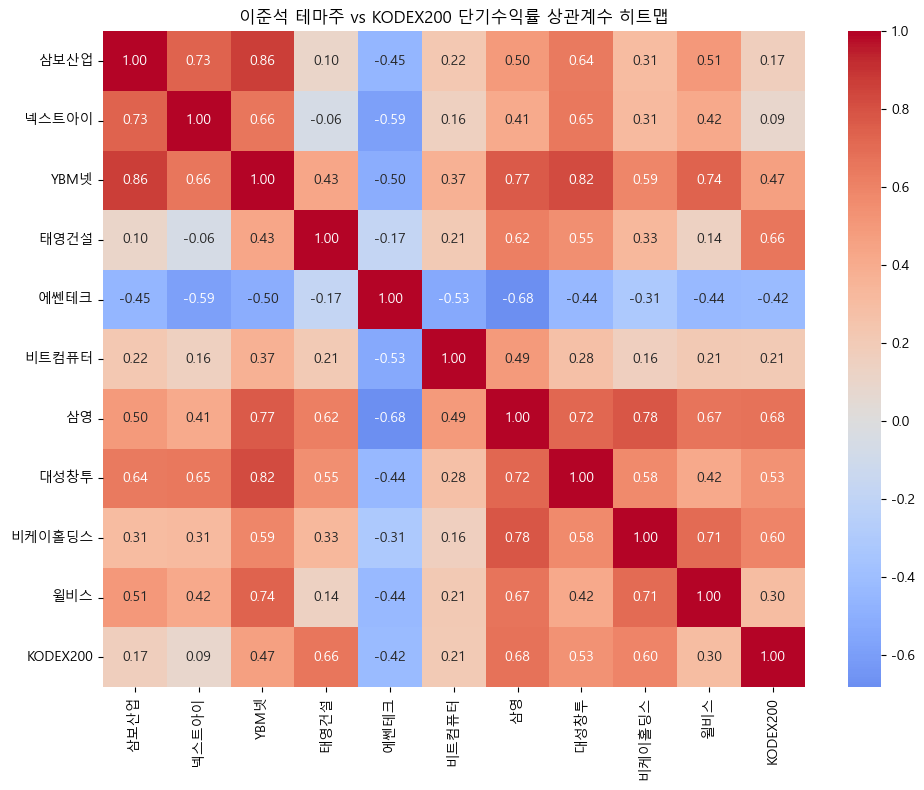

In [1]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


label_dict = {
    'thema1': '삼보산업',
    'thema2': '넥스트아이',
    'thema3': 'YBM넷',
    'thema4': '태영건설',
    'thema5': '에쎈테크',
    'thema6': '비트컴퓨터',
    'thema7': '삼영',
    'thema8': '대성창투',
    'thema9': '비케이홀딩스',
    'thema10' : '윌비스'
}



# 날짜 설정
start_date = '2025-03-29' #경선확정일 - 10
end_date = '2025-04-18' #경선확정일 + 10

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 = fdr.DataReader('009620', start=start_date, end=end_date) #테마주1
thema2 = fdr.DataReader('137940', start=start_date, end=end_date)
thema3 = fdr.DataReader('057030', start=start_date, end=end_date)
thema4 = fdr.DataReader('009410', start=start_date, end=end_date)
thema5 = fdr.DataReader('043340', start=start_date, end=end_date)
thema6 = fdr.DataReader('032850', start=start_date, end=end_date)
thema7 = fdr.DataReader('003720', start=start_date, end=end_date)
thema8 = fdr.DataReader('027830', start=start_date, end=end_date)
thema9 = fdr.DataReader('050090', start=start_date, end=end_date)
thema10 = fdr.DataReader('008600', start=start_date, end=end_date)

thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema5'] = thema5['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']
thema['thema9'] = thema9['Close']
thema['thema10'] = thema10['Close']

# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = fdr.DataReader('069500', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 이준석 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("이준석 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
